# Employee Attrition Prediction

First of all I would like to thank Consultancy and Analytics Club of IIT Guwahati, for conducting such a wonderful hackathon. It was really fun in applying what we learned in the course. Also this has been an ice breaker for me as from now onwards I can start kaggling. Here I share my first kernel, do upvote it if you find it helpful.

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. Here in this project we look at various parameters responsible for attrition of employee and at the end will build a model to predict Employee Attrition.

## Importing libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import IPython

In [2]:
pd.set_option('max_columns', None) #to display all the columns
X = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
X.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [3]:
y = X['Attrition']
X.drop(['Attrition'], axis =1, inplace=True)

In [4]:
X.shape

(1628, 28)

In [5]:
from sklearn.model_selection import train_test_split
X.drop(columns='Id',inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=1)


## Encoding

In [6]:
#check the unique values in object columns to see whether to do hotencoding or labelencoding on them
obj_dict_train={obj_col: list(X_train[obj_col].unique()) for obj_col in X_train.select_dtypes(include='object')}
obj_dict_train

{'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Laboratory Technician',
  'Sales Executive',
  'Healthcare Representative',
  'Manager',
  'Manufacturing Director',
  'Research Director',
  'Human Resources'],
 'MaritalStatus': ['Married', 'Single', 'Divorced'],
 'OverTime': ['No', 'Yes']}

In [7]:
obj_dict_valid={obj_col: list(X_valid[obj_col].unique()) for obj_col in X_valid.select_dtypes(include='object')}
obj_dict_valid

{'BusinessTravel': ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Marketing',
  'Medical',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Manager',
  'Healthcare Representative',
  'Sales Executive',
  'Laboratory Technician',
  'Manufacturing Director',
  'Human Resources',
  'Research Director'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'OverTime': ['No', 'Yes']}

We checked for the unique values in validation set as well in oreder to check that both training set and validation set have the same unique values, otherwise label encoding will fail.

In [8]:
label_col = ['BusinessTravel', 'OverTime']     # these two have ordinal categorical data
hotencode_col = list(set(X.select_dtypes(include='object').columns)-set(label_col))   

### Hot Encoding

In [9]:
X_train = pd.concat([X_train, pd.get_dummies(X_train[hotencode_col])], axis=1)
X_valid = pd.concat([X_valid, pd.get_dummies(X_valid[hotencode_col])], axis=1)
X_train.drop(hotencode_col, axis=1, inplace=True)
X_valid.drop(hotencode_col,axis=1,inplace=True)

X_test = pd.concat([X_test, pd.get_dummies(X_test[hotencode_col])], axis=1)
X_test.drop(hotencode_col, axis=1, inplace=True)

### Ordinal Encoding

In [10]:
#for ordinally encoding BussinessTravel column in train set
cat1 = pd.Categorical(X_train.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True)
X_train['BusinessTravel'] = labels1

#for ordinally encoding OverTime column in train set
cat2 = pd.Categorical(X_train.OverTime, categories=['No','Yes'], ordered=True)
labels2, unique2 = pd.factorize(cat2, sort=True)
X_train['OverTime'] = labels2


#for ordinally encoding BussinessTravel column in validation set
cat_1 = pd.Categorical(X_valid.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_1, unique_1 = pd.factorize(cat_1, sort=True)
X_valid['BusinessTravel'] = labels_1

#for ordinally encoding OverTime column in validation set
cat_2 = pd.Categorical(X_valid.OverTime, categories=['No','Yes'], ordered=True)
labels_2, unique_2 = pd.factorize(cat_2, sort=True)
X_valid['OverTime'] = labels_2


#for ordinally encoding BussinessTravel column in test set
cat_test1 = pd.Categorical(X_test.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_test1, unique_test1 = pd.factorize(cat_test1, sort=True)
X_test['BusinessTravel'] = labels_test1

#for ordinally encoding OverTime column in test set
cat_test2 = pd.Categorical(X_test.OverTime, categories=['No','Yes'], ordered=True)
labels_test2, unique_test2 = pd.factorize(cat_test2, sort=True)
X_test['OverTime'] = labels_test2

In [11]:
# dropping useless columns
X_train.drop(columns =['Behaviour','Gender_Female'], inplace=True)
X_valid.drop(columns =['Behaviour','Gender_Female'], inplace=True)
X_test.drop(columns =['Behaviour','Gender_Female'], inplace=True)


## Feature Scaling

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
So these more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance.

For more information check out [why we should do feature scaling?](http://https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

In [12]:
# As all the columns now have numerical dataype we see the number of unique values to find 
#the columns with numerical data
X_train.nunique()

Age                                   43
BusinessTravel                         3
DistanceFromHome                      29
Education                              5
EmployeeNumber                       754
EnvironmentSatisfaction                4
JobInvolvement                         4
JobSatisfaction                        4
MonthlyIncome                        717
NumCompaniesWorked                    10
OverTime                               2
PercentSalaryHike                     15
PerformanceRating                      2
StockOptionLevel                       4
TotalWorkingYears                     39
TrainingTimesLastYear                  7
YearsAtCompany                        32
YearsInCurrentRole                    18
YearsSinceLastPromotion               16
YearsWithCurrManager                  17
CommunicationSkill                     5
Department_Human Resources             2
Department_Research & Development      2
Department_Sales                       2
EducationField_H

In [13]:
num_cols = [col for col in X_train.columns if X_train[col].nunique()>5]

In [14]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler(copy=False)
scaled_train = pd.DataFrame(num_scaler.fit_transform(X_train[num_cols]))
scaled_valid = pd.DataFrame(num_scaler.transform(X_valid[num_cols]))
scaled_test = pd.DataFrame(num_scaler.transform(X_test[num_cols]))
scaled_test.columns  = num_cols
scaled_train.columns = num_cols
scaled_valid.columns = num_cols
scaled_train.index=X_train.index
scaled_valid.index=X_valid.index
scaled_test.index=X_test.index

In [15]:
X_train.drop(columns = num_cols, inplace=True)
X_valid.drop(columns = num_cols, inplace=True)
X_test.drop(columns = num_cols, inplace =True)
X_train = pd.concat([X_train, scaled_train], axis =1)
X_valid = pd.concat([X_valid, scaled_valid], axis =1)
X_test = pd.concat([X_test, scaled_test], axis =1)

## Data Visualization

> Data visualization is useful for data cleaning, exploring data structure, detecting outliers and unusual groups, identifying trends and clusters, spotting local patterns, evaluating modeling output, and presenting results.

This is what the google says (XD).

In [16]:
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')

### Categorical Data

In [17]:
#preparing dataset for plotting
data_count = pd.concat([X_train.drop(columns = num_cols), y], axis=1)

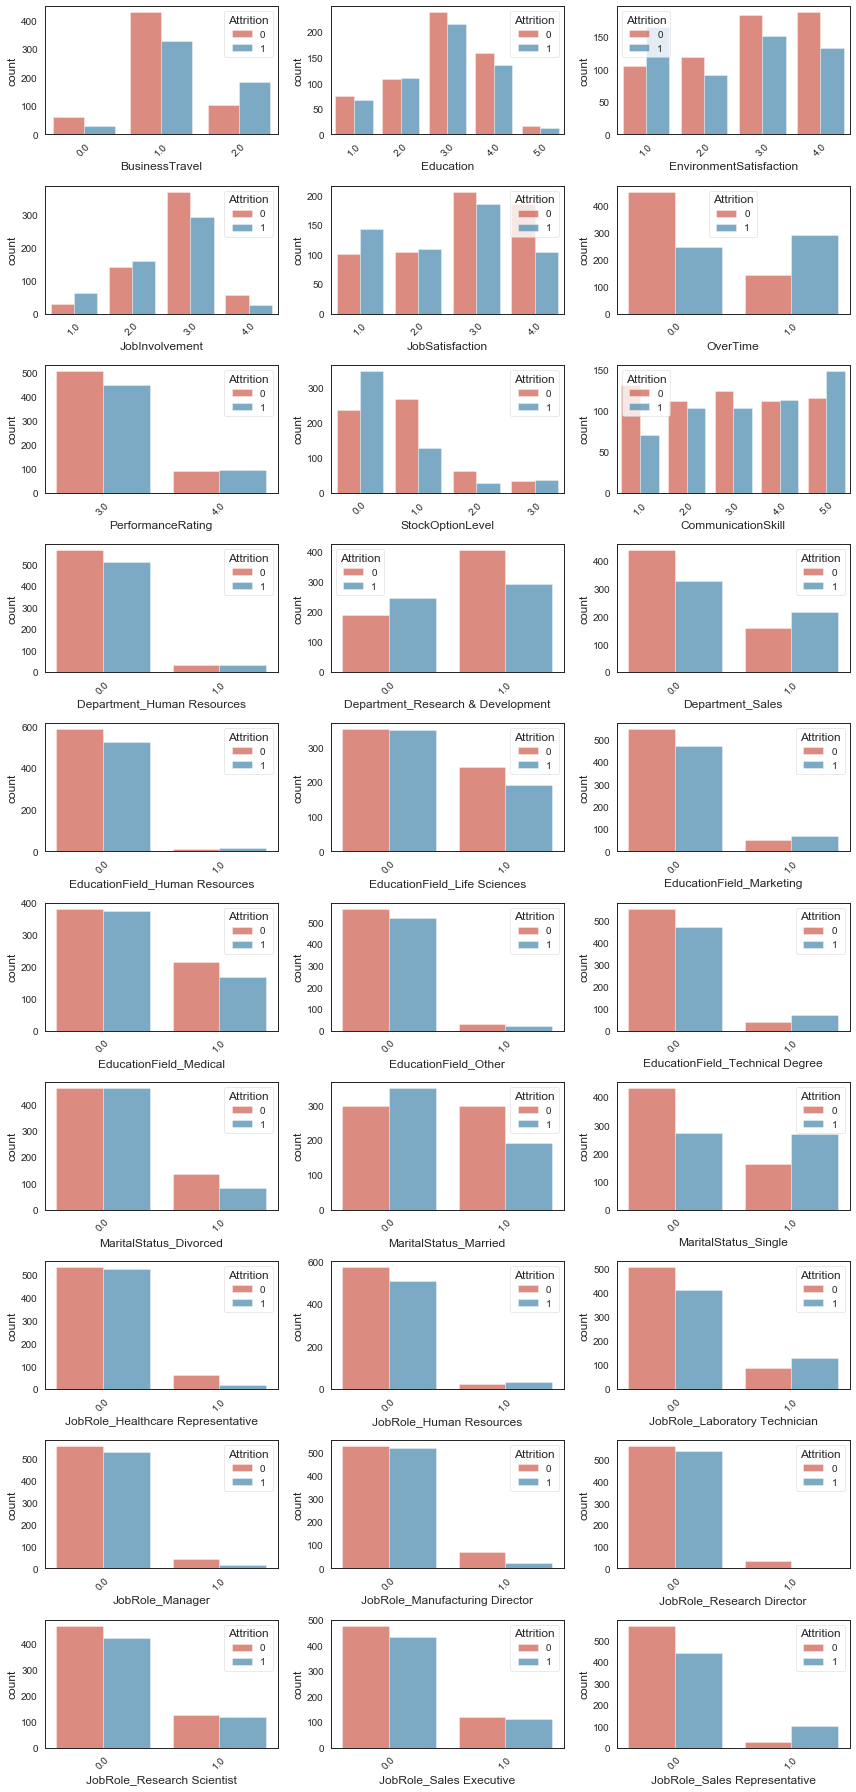

In [18]:
fig, axes = plt.subplots(round((len(data_count.columns)-1) / 3), 3, figsize=(12, 25))

for i, ax in enumerate(fig.axes):
    if i <= len(data_count.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data_count.columns[i], hue=data_count.Attrition, alpha=0.7, data=data_count, ax=ax)

fig.tight_layout()

We shall use these plots later on for feature engineering. Now lets visualize numerical data.

### Numerical Data

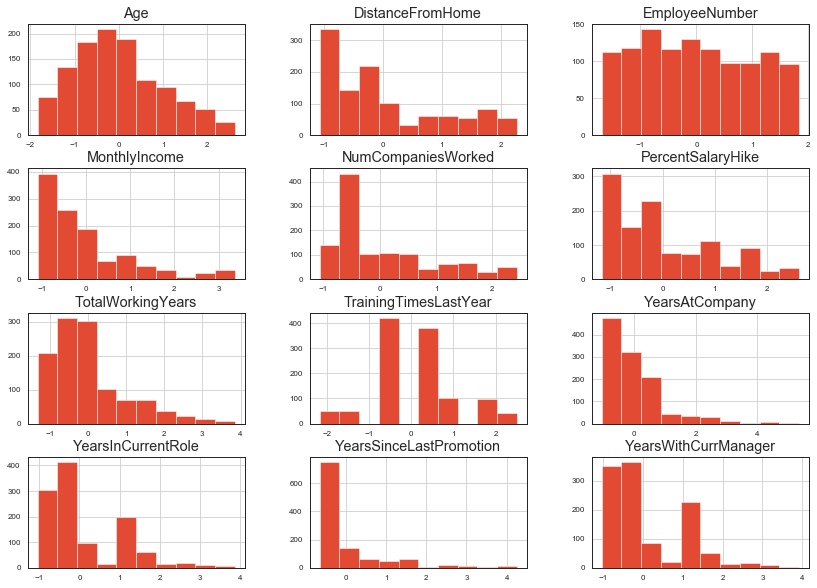

In [19]:
X_train[num_cols].hist(figsize=(14,10),xlabelsize=8, ylabelsize=8);

We can see that the columns are skewed. We shall come back to it later. 

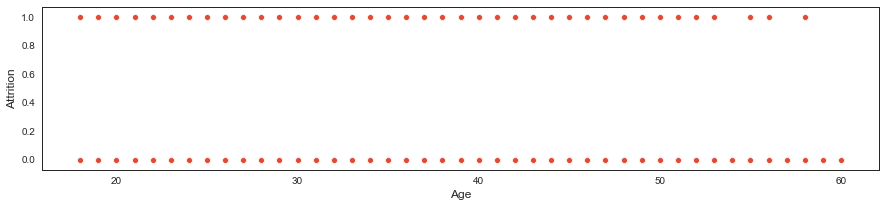

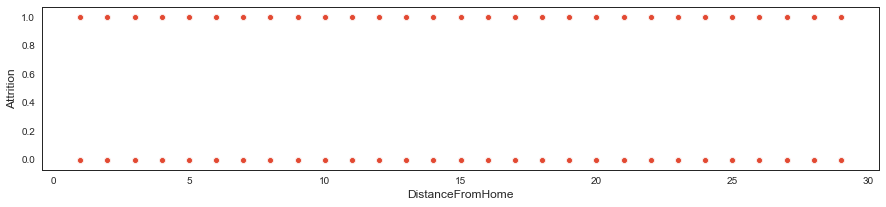

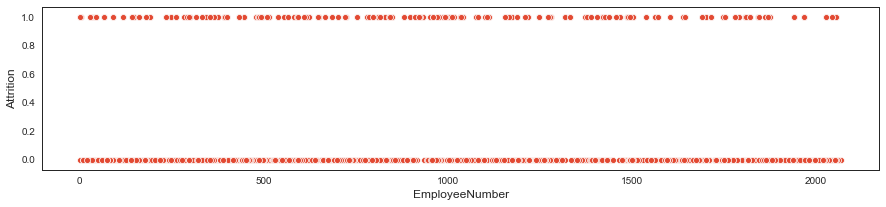

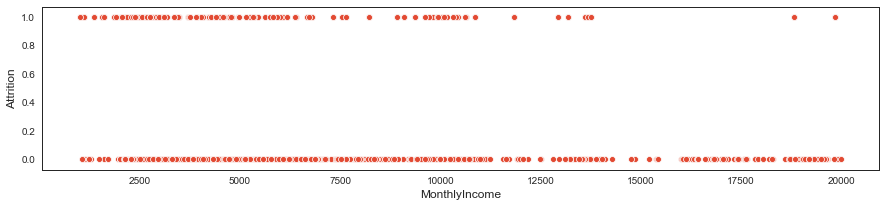

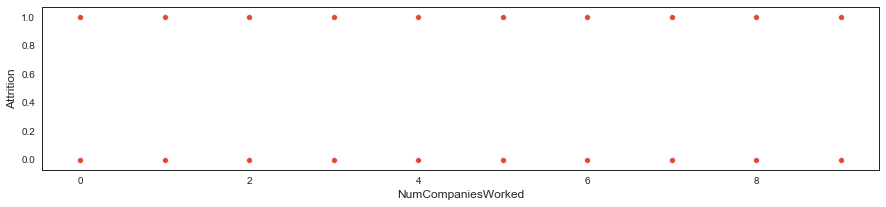

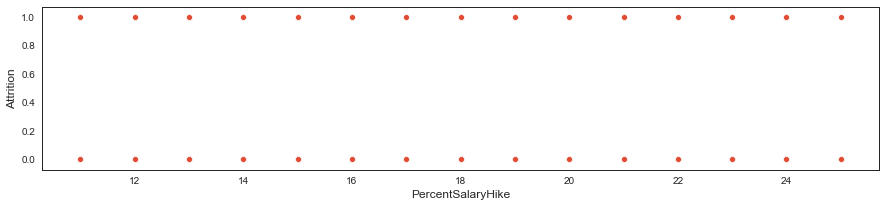

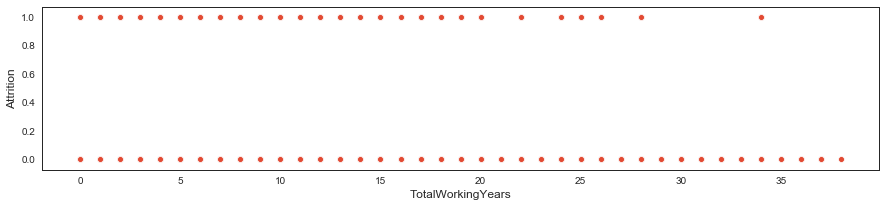

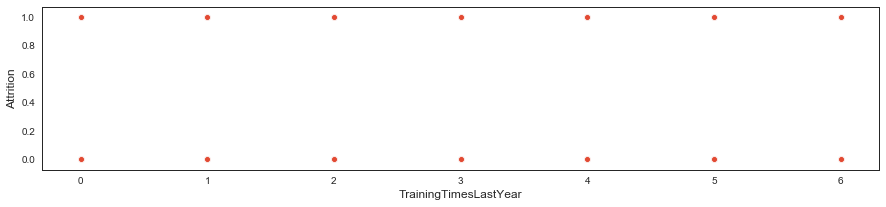

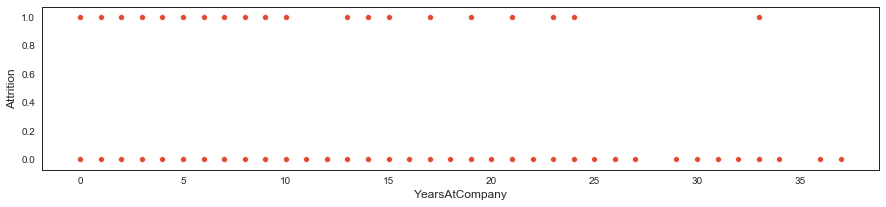

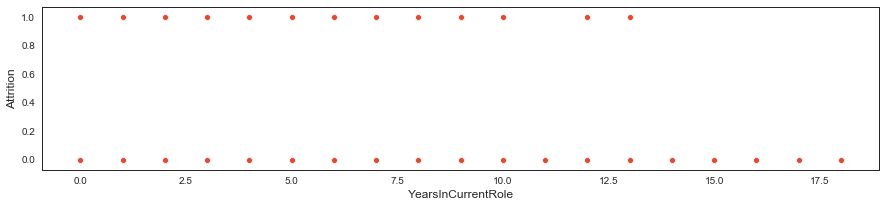

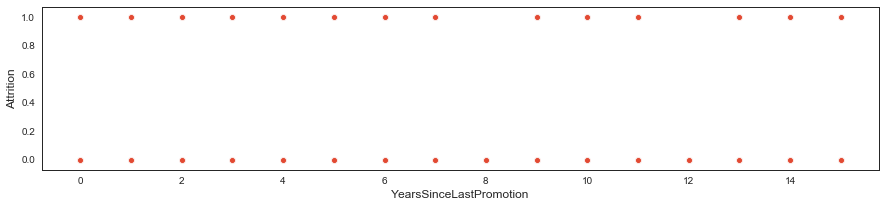

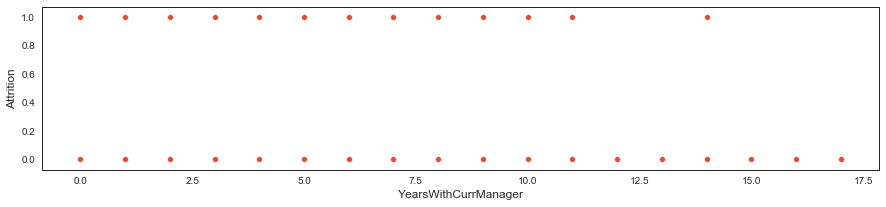

In [20]:
for col in num_cols:
    plt.figure(figsize=(15,3))
    sns.scatterplot(x=X[col],y=y)
    plt.show()

Here we can see some columns like
`MonthlyIncome`, `TotalWorkingYears` , `YearsAtCompany`, `YearsInCurrentRole` and `YearsWithCurrentManager` have a rough threshold which divides the the two categories.

In [21]:
data_pair = pd.concat([X_train[num_cols],y_train], axis=1)

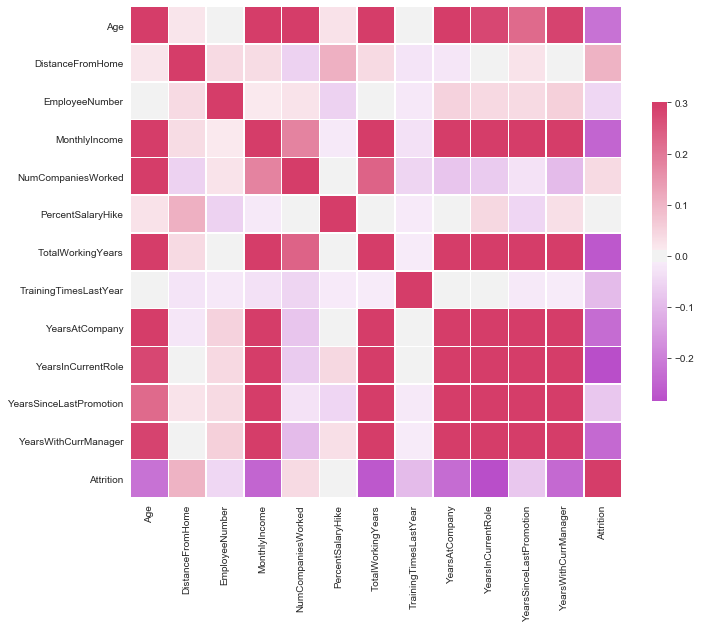

In [22]:
corr_matrix = data_pair.corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

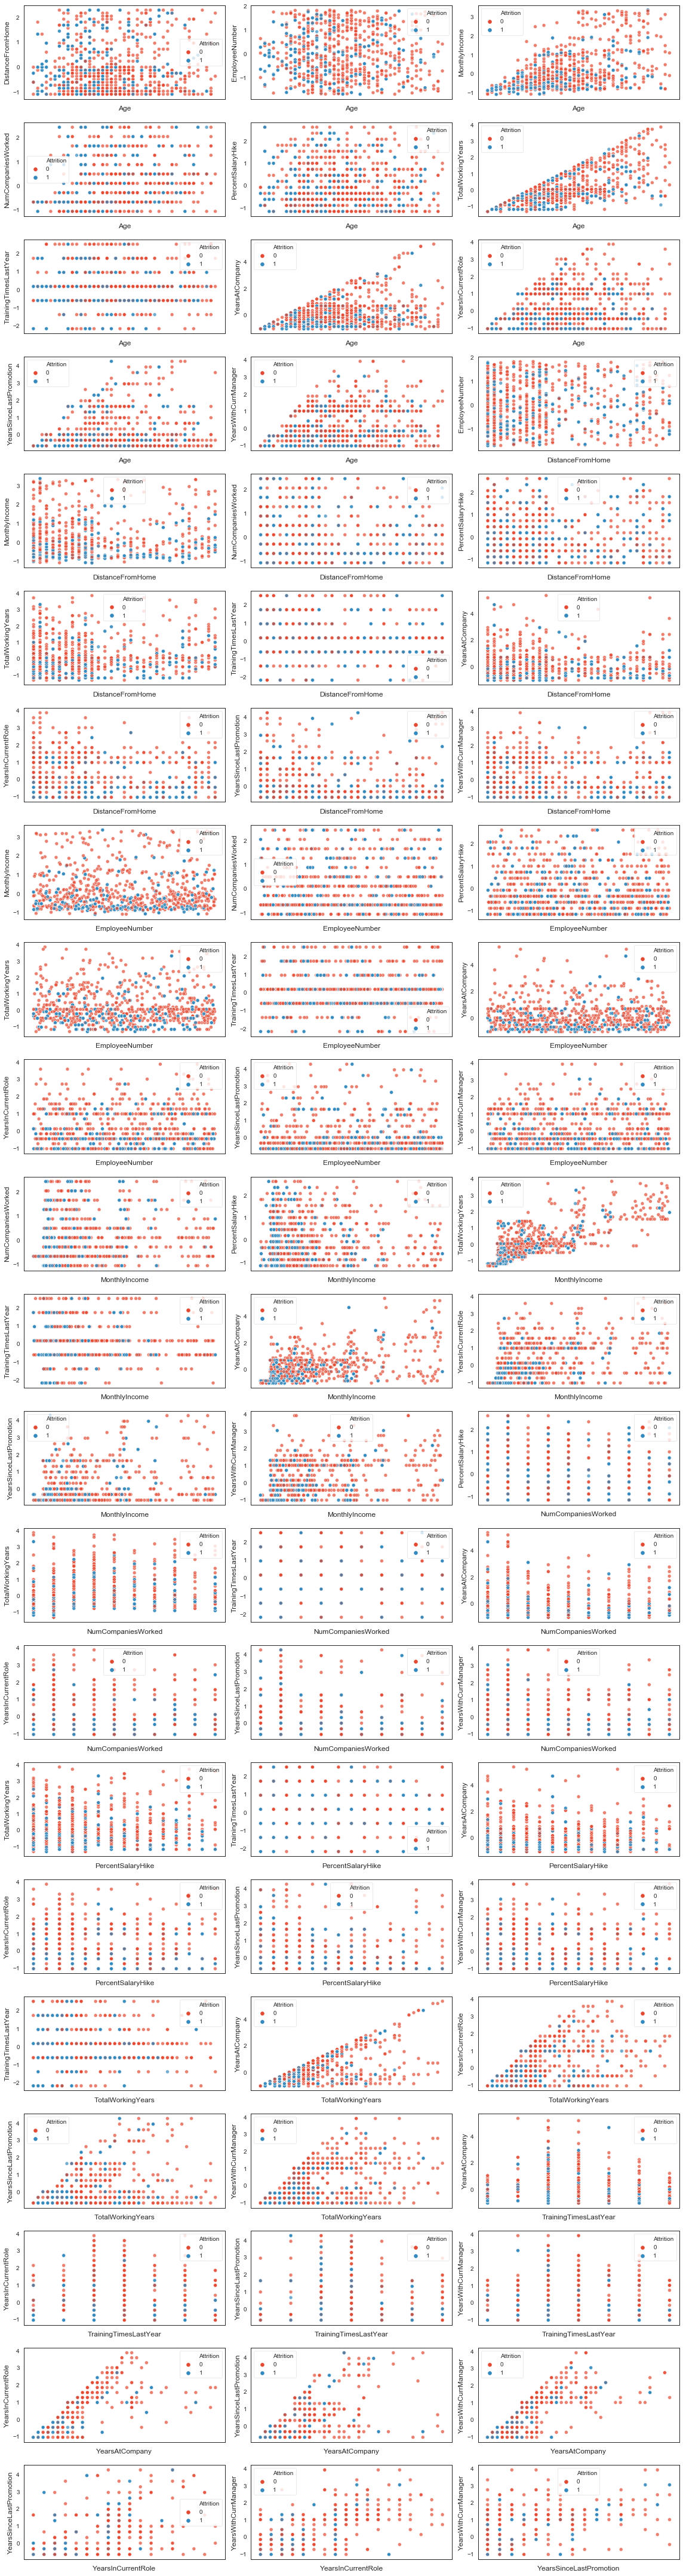

In [23]:
rows = round(len(num_cols)*(len(num_cols)-1)/6)
fig, axes = plt.subplots(rows, 3, figsize=(16, 60))
i=0
j=i+1
for __, ax in enumerate(fig.axes):
    if i==len(num_cols): break
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.scatterplot(data=data_pair, x=data_pair.columns[i], y=data_pair.columns[j], hue='Attrition', alpha=0.7, ax=ax)
    j+=1
    if j==len(num_cols): 
        i+=1
        j=i+1
fig.tight_layout()

These are **very important** plots for doing feature engineering. We shall use these visualizations to combine two columns to form new features. Lets begin the feature engineering part.

## Feature Engineering

### Categorical Features

In [24]:
X_train['stock0'] = (X_train.StockOptionLevel==0).astype(int)
X_valid['stock0'] = (X_valid.StockOptionLevel==0).astype(int)
X_test['stock0'] = (X_test.StockOptionLevel==0).astype(int)

X_train['jobsatisfied'] = (X_train.JobSatisfaction==4).astype(int)
X_valid['jobsatisfied'] = (X_valid.JobSatisfaction==4).astype(int)
X_test['jobsatisfied'] = (X_test.JobSatisfaction==4).astype(int)

X_train['well_communicate'] = (X_train.CommunicationSkill==5).astype(int)
X_valid['well_communicate'] = (X_valid.CommunicationSkill==5).astype(int)
X_test['well_communicate'] = (X_test.CommunicationSkill==5).astype(int)

X_train['less_mi'] = (X_train.MonthlyIncome<0.2).astype(int)
X_valid['less_mi'] = (X_valid.MonthlyIncome<0.2).astype(int)
X_test['less_mi'] = (X_test.MonthlyIncome<0.2).astype(int)

### Numerical Features

In [25]:
X_train['mi_age']=X_train.MonthlyIncome*X_train.Age
X_valid['mi_age']=X_valid.MonthlyIncome*X_valid.Age
X_test['mi_age']=X_test.MonthlyIncome*X_test.Age

X_train['twy_age']=X_train.TotalWorkingYears*X_train.Age
X_valid['twy_age']=X_valid.TotalWorkingYears*X_valid.Age
X_test['twy_age']=X_test.TotalWorkingYears*X_test.Age

X_train['yac_age']=np.square(X_train.YearsAtCompany)/0.7+np.square(X_train.Age)
X_valid['yac_age']=np.square(X_valid.YearsAtCompany)/0.7+np.square(X_valid.Age)
X_test['yac_age']=np.square(X_test.YearsAtCompany)/0.7+np.square(X_test.Age)

X_train['mi_dfh']=np.square(X_train.MonthlyIncome)/0.2-np.square(X_train.DistanceFromHome)
X_valid['mi_dfh']=np.square(X_valid.MonthlyIncome)/0.2-np.square(X_valid.DistanceFromHome)
X_test['mi_dfh']=np.square(X_test.MonthlyIncome)/0.2-np.square(X_test.DistanceFromHome)

X_train['yac_dfh']=np.square(X_train.YearsAtCompany)/0.5-np.square(X_train.DistanceFromHome)
X_valid['yac_dfh']=np.square(X_valid.YearsAtCompany)/0.5-np.square(X_valid.DistanceFromHome)
X_test['yac_dfh']=np.square(X_test.YearsAtCompany)/0.5-np.square(X_test.DistanceFromHome)

X_train['mi_twc']=X_train.MonthlyIncome*X_train.TotalWorkingYears
X_valid['mi_twc']=X_valid.MonthlyIncome*X_valid.TotalWorkingYears
X_test['mi_twc']=X_test.MonthlyIncome*X_test.TotalWorkingYears

X_train['mi_yac']=X_train.MonthlyIncome*X_train.YearsAtCompany
X_valid['mi_yac']=X_valid.MonthlyIncome*X_valid.YearsAtCompany
X_test['mi_yac']=X_test.MonthlyIncome*X_test.YearsAtCompany

X_train['twy_ywcm']=np.square(X_train.TotalWorkingYears)/0.6-np.square(X_train.YearsWithCurrManager)/8
X_valid['twy_ywcm']=np.square(X_valid.TotalWorkingYears)/0.6-np.square(X_valid.YearsWithCurrManager)/8
X_test['twy_ywcm']=np.square(X_test.TotalWorkingYears)/0.6-np.square(X_test.YearsWithCurrManager)/8

In [26]:
# scaling the newly formed features
new_cols =['mi_age','twy_age','yac_age','mi_dfh','yac_dfh','mi_twc','mi_yac','twy_ywcm']
scaled_train1 = pd.DataFrame(num_scaler.fit_transform(X_train[new_cols]))
scaled_valid1 = pd.DataFrame(num_scaler.transform(X_valid[new_cols]))
scaled_test1 = pd.DataFrame(num_scaler.transform(X_test[new_cols]))
scaled_test1.columns = new_cols
scaled_train1.columns = new_cols
scaled_valid1.columns = new_cols
scaled_train1.index=X_train.index
scaled_valid1.index=X_valid.index
scaled_test1.index=X_test.index

X_train.drop(columns = new_cols, inplace=True)
X_valid.drop(columns = new_cols, inplace=True)
X_test.drop(columns = new_cols, inplace =True)
X_train = pd.concat([X_train, scaled_train1], axis =1)
X_valid = pd.concat([X_valid, scaled_valid1], axis =1)
X_test = pd.concat([X_test, scaled_test1], axis =1)

I know I have not given much explaination here as to how I engineered these features. I tried many combinations and after plotting them, I have chosen these set of features. If you  have any confusion or any suggestion, feel free to ping me.

### Handling Skewed columns


We shall look at the numerical columns to treat any skewed columns if present.

In [27]:
num_cols2 = [col for col in X_train.columns if X_train[col].nunique()>10]

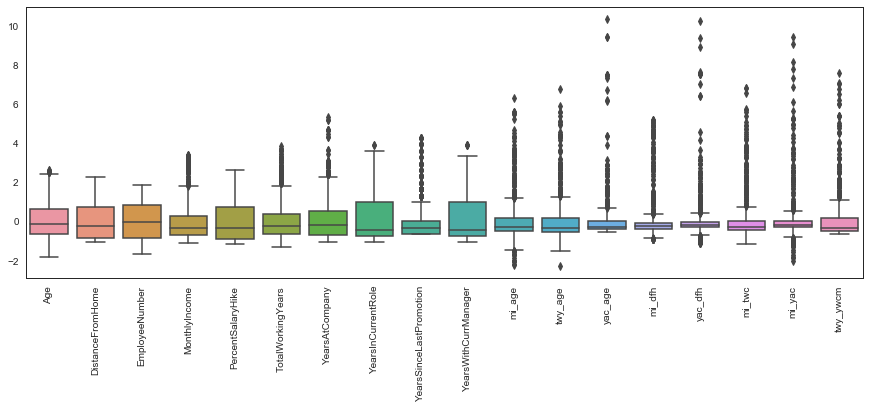

In [28]:
# using boxplot to check for outliers and skewedness
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train[num_cols2])
plt.xticks(rotation=90)
plt.show()

As we can see many columns are skewed and have outliers. To treat them, we shall perform some transformations (`log` or `sqrt` mainly) on the selected columns to minimize their skewness. Again I have already tried many combinations before choosing the below transformations.

In [29]:
X_train['twy_ywcm'] = np.log(2+X_train.twy_ywcm/2)
X_train['mi_yac'] = np.log(3+X_train.mi_yac)
X_train['mi_twc'] = np.log(3+X_train.mi_twc)
X_train['yac_dfh'] = np.log(2+X_train.yac_dfh)
X_train['mi_dfh'] = np.log(2+X_train.mi_dfh)
X_train['yac_age'] = np.log(2+X_train.yac_age)
X_train['twy_age'] = np.sqrt(3+X_train.twy_age)
X_train['mi_age'] = np.sqrt(3+X_train.mi_age)
X_train['YearsSinceLastPromotion'] = np.log(1.5+X_train.YearsSinceLastPromotion/2)
X_train['MonthlyIncome'] = np.log(2+X_train.MonthlyIncome)
X_train['TotalWorkingYears'] = np.log(2+X_train.TotalWorkingYears)
X_train['YearsAtCompany'] = np.sqrt(3+X_train.YearsAtCompany/5)

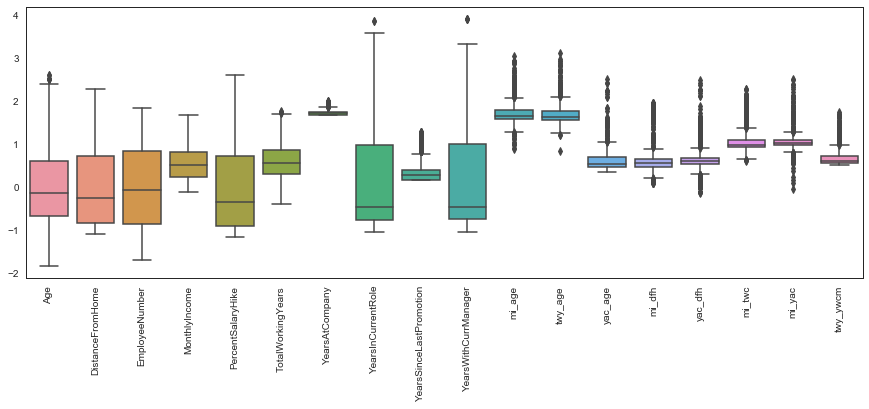

In [30]:
# again plot the boxplot to see the difference
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train[num_cols2])
plt.xticks(rotation=90)
plt.show()

See the transformations have decreased the skewness of the data. Although it is better than what we originally had, still some improvements can be done. I shall leave it to you to experiment with more features and let me know if you get better results.

In [31]:
# creating same features for validation set
X_valid['twy_ywcm'] = np.log(2+X_valid.twy_ywcm/2)
X_valid['mi_yac'] = np.log(3+X_valid.mi_yac)
X_valid['mi_twc'] = np.log(3+X_valid.mi_twc)
X_valid['yac_dfh'] = np.log(2+X_valid.yac_dfh)
X_valid['mi_dfh'] = np.log(2+X_valid.mi_dfh)
X_valid['yac_age'] = np.log(2+X_valid.yac_age)
X_valid['twy_age'] = np.sqrt(3+X_valid.twy_age)
X_valid['mi_age'] = np.sqrt(3+X_valid.mi_age)
X_valid['YearsSinceLastPromotion'] = np.log(1.5+X_valid.YearsSinceLastPromotion/2)
X_valid['MonthlyIncome'] = np.log(2+X_valid.MonthlyIncome)
X_valid['TotalWorkingYears'] = np.log(2+X_valid.TotalWorkingYears)
X_valid['YearsAtCompany'] = np.sqrt(3+X_valid.YearsAtCompany/5)

In [32]:
# creating same features for test set
X_test['twy_ywcm'] = np.log(2+X_test.twy_ywcm/2)
X_test['mi_yac'] = np.log(3+X_test.mi_yac)
X_test['mi_twc'] = np.log(3+X_test.mi_twc)
X_test['yac_dfh'] = np.log(2+X_test.yac_dfh)
X_test['mi_dfh'] = np.log(2+X_test.mi_dfh)
X_test['yac_age'] = np.log(2+X_test.yac_age)
X_test['twy_age'] = np.sqrt(3+X_test.twy_age)
X_test['mi_age'] = np.sqrt(3+X_test.mi_age)
X_test['YearsSinceLastPromotion'] = np.log(1.5+X_test.YearsSinceLastPromotion/2)
X_test['MonthlyIncome'] = np.log(2+X_test.MonthlyIncome)
X_test['TotalWorkingYears'] = np.log(2+X_test.TotalWorkingYears)
X_test['YearsAtCompany'] = np.sqrt(3+X_test.YearsAtCompany/5)

In [33]:
X_train_final = pd.concat([X_train,X_valid],axis=0)
y_train_final = pd.concat([y_train,y_valid],axis=0)
X_train_final.reset_index(drop=True)
y_train_final.reset_index(drop=True)

0       0
1       1
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    1
1626    0
1627    0
Name: Attrition, Length: 1628, dtype: int64

## Model 


### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score

In [35]:
num_iters=np.arange(200,501,50)
C = np.arange(0.1,3,0.1, dtype=np.float32)
arg=[]
for i in C:
    for j in num_iters: arg.append((j,i))

In [36]:
# model for checking the validation score
def model(arg):
    num_iters = arg[0]
    C=arg[1]
    lr=LogisticRegression(solver='liblinear', max_iter=num_iters,C=C, verbose=0, random_state=7)
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_valid)
    return roc_auc_score(y_valid,predictions)

In [37]:
for params in arg:
    score = model(params)
    print("C={}, iterations={} : {}".format(params[1],params[0],score))


C=0.10000000149011612, iterations=200 : 0.7708270601224532
C=0.10000000149011612, iterations=250 : 0.7708270601224532
C=0.10000000149011612, iterations=300 : 0.7708270601224532
C=0.10000000149011612, iterations=350 : 0.7708270601224532
C=0.10000000149011612, iterations=400 : 0.7708270601224532
C=0.10000000149011612, iterations=450 : 0.7708270601224532
C=0.10000000149011612, iterations=500 : 0.7708270601224532
C=0.20000000298023224, iterations=200 : 0.776974806785105
C=0.20000000298023224, iterations=250 : 0.776974806785105
C=0.20000000298023224, iterations=300 : 0.776974806785105
C=0.20000000298023224, iterations=350 : 0.776974806785105
C=0.20000000298023224, iterations=400 : 0.776974806785105
C=0.20000000298023224, iterations=450 : 0.776974806785105
C=0.20000000298023224, iterations=500 : 0.776974806785105
C=0.30000001192092896, iterations=200 : 0.7810398474355116
C=0.30000001192092896, iterations=250 : 0.7810398474355116
C=0.30000001192092896, iterations=300 : 0.7810398474355116
C=0.

C=2.200000047683716, iterations=350 : 0.7932600622302519
C=2.200000047683716, iterations=400 : 0.7932600622302519
C=2.200000047683716, iterations=450 : 0.7932600622302519
C=2.200000047683716, iterations=500 : 0.7932600622302519
C=2.299999952316284, iterations=200 : 0.7932600622302519
C=2.299999952316284, iterations=250 : 0.7932600622302519
C=2.299999952316284, iterations=300 : 0.7932600622302519
C=2.299999952316284, iterations=350 : 0.7932600622302519
C=2.299999952316284, iterations=400 : 0.7932600622302519
C=2.299999952316284, iterations=450 : 0.7932600622302519
C=2.299999952316284, iterations=500 : 0.7932600622302519
C=2.3999998569488525, iterations=200 : 0.7932600622302519
C=2.3999998569488525, iterations=250 : 0.7932600622302519
C=2.3999998569488525, iterations=300 : 0.7932600622302519
C=2.3999998569488525, iterations=350 : 0.7932600622302519
C=2.3999998569488525, iterations=400 : 0.7932600622302519
C=2.3999998569488525, iterations=450 : 0.7932600622302519
C=2.3999998569488525, ite

In [38]:

lr_final = LogisticRegression( solver='liblinear',C=1.8, max_iter=300,random_state=7)
lr_final.fit(X_train,y_train)
pred_lr = lr_final.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid,pred_lr)

0.878249523235973

## Feature Selection

So what is the need of Feature Selection?
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.

In [39]:
feature_weights = np.array(lr_final.coef_).reshape(-1)

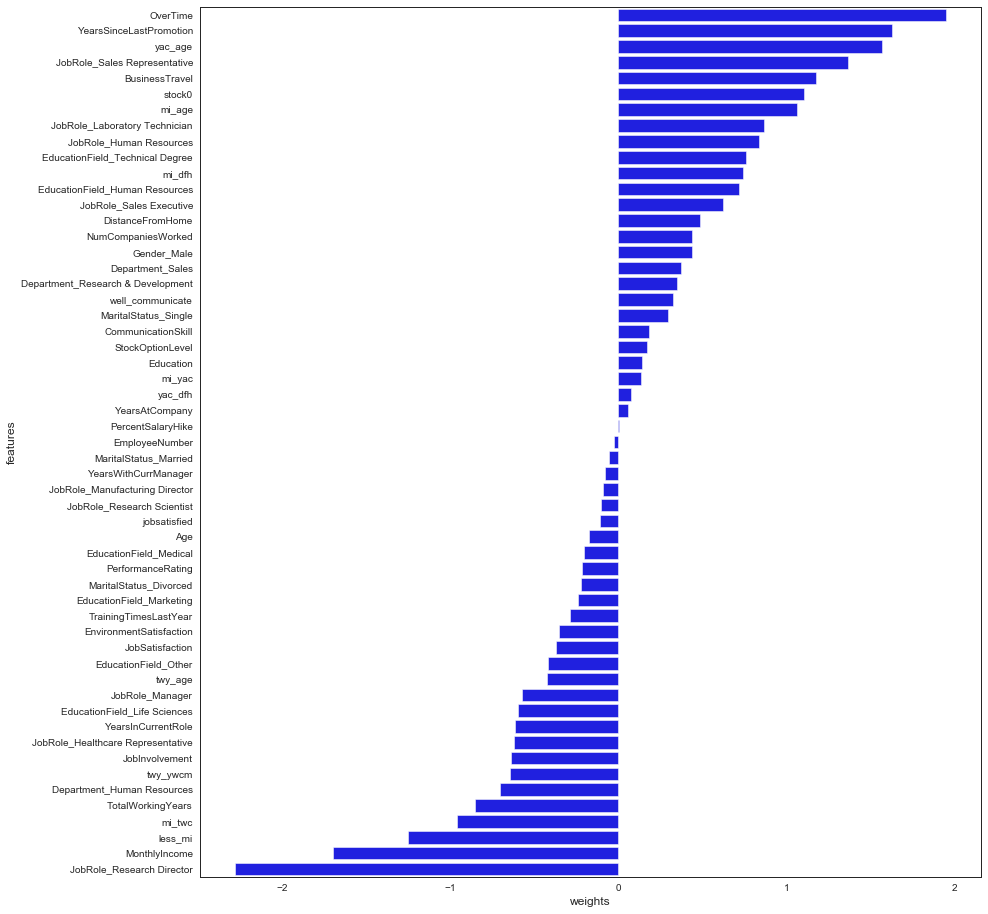

In [40]:
feature_val = pd.DataFrame({'features':X_train.columns, 'weights':feature_weights})
feature_val.sort_values(by='weights', ascending=False, inplace=True)
plt.figure(figsize=(14,16))
sns.barplot(y='features',x='weights',data=feature_val,color='blue')
plt.show()

In [41]:
#Columns which have absolute value of weights less than 0.1
less_weight_cols= feature_val[abs(feature_val.weights)<0.1].features.to_list()
less_weight_cols

['yac_dfh',
 'YearsAtCompany',
 'PercentSalaryHike',
 'EmployeeNumber',
 'MaritalStatus_Married',
 'YearsWithCurrManager',
 'JobRole_Manufacturing Director']

In [42]:
#---------------
X_train_final.drop(columns=less_weight_cols,inplace=True)

X_test.drop(columns=less_weight_cols,inplace=True)

In [43]:
lr_final.fit(X_train_final,y_train_final)
lr_final

LogisticRegression(C=1.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Output

In [45]:
final_pred = lr_final.predict_proba(X_test.drop(columns='Id'))[:,1]
output = pd.concat([X_test.Id,pd.Series(final_pred)], axis=1)
output.columns=['Id','Attrition']
output.set_index('Id')
output.to_csv("submission.csv",index=False)